In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from visanalysis.util import general_utils as gu
from visanalysis.plugin.twentyfourhourfitness import TwentyFourHourDataObject
from ballrig_analysis.utils import plot_tools as pt

In [7]:
date = '2023-08-16'
date_path = os.path.join('/oak/stanford/groups/trc/data/yandan/2023behavior/import', date)
stimpack_hdf_path = os.path.join(date_path, date + '.hdf5')
print(stimpack_hdf_path)

/oak/stanford/groups/trc/data/yandan/2023behavior/import/2023-08-16/2023-08-16.hdf5


In [9]:
series_data = TwentyFourHourDataObject(file_path=stimpack_hdf_path, series_number=1, quiet=False)

In [10]:
stimulus_timing = series_data.getStimulusTiming()
stimulus_start_times = stimulus_timing['stimulus_start_times']

In [13]:
fictrac_data_for_epoch = series_data.getBehaviorData(stimulus_timing=stimulus_timing)

In [15]:
len(fictrac_data_for_epoch)

226

In [17]:
type(fictrac_data_for_epoch[0])

dict

In [18]:
fictrac_data_for_epoch[0].keys()

dict_keys(['timestamps', 'data'])

In [19]:
fictrac_data_for_epoch[0]['timestamps']

array([-0.9976449 , -0.99434495, -0.9911449 , ...,  3.99665499,
        3.99995494,  4.00315499])

In [20]:
fictrac_data_for_epoch[0]['data']

,rel_vec_cam_x,rel_vec_cam_y,rel_vec_cam_z,error,rel_vec_world_x,rel_vec_world_y,rel_vec_world_z,abs_vec_cam_x,abs_vec_cam_y,abs_vec_cam_z,...,integrated_heading,direction,speed,integrated_x_movement,integrated_y_movement,timestamp,sequence_number,delta_ts,timestamp_alt,sync
frame_count,,,,,,,,,,,,,,,,,,,,,
1195,0.017087,-0.008098,0.012054,3958.246456,0.008038,0.011595,0.017429,0.310216,-1.511525,0.294967,...,1.494385,5.677039,0.014109,1.467226,0.378927,1.692229e+12,1195,3.286865,5.961438e+07,19.750000
1196,0.018319,-0.005508,0.002274,3920.820652,-0.000260,0.005754,0.018383,0.325915,-1.520090,0.284115,...,1.476002,0.045172,0.005760,1.472980,0.379187,1.692229e+12,1196,3.334961,5.961439e+07,20.147059
1197,0.018736,-0.000942,0.003540,4331.194444,0.002504,0.001908,0.018829,0.343380,-1.523994,0.272992,...,1.457173,5.363643,0.003148,1.474889,0.376683,1.692229e+12,1197,3.251953,5.961439e+07,19.544118
1198,0.015512,-0.002077,0.000596,4191.156403,-0.000566,0.001985,0.015525,0.355927,-1.528749,0.262186,...,1.441648,0.277989,0.002064,1.476874,0.377249,1.692229e+12,1198,3.304199,5.961439e+07,19.669118
1199,0.011462,0.000337,-0.003702,4105.141540,-0.003650,-0.001728,0.011353,0.362153,-1.530974,0.250533,...,1.430295,2.013021,0.004038,1.475145,0.380899,1.692229e+12,1199,3.298828,5.961440e+07,21.345588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,-0.000392,-0.003823,0.001731,3483.943182,0.000303,0.004191,-0.000338,-0.659379,2.475402,0.051384,...,-1.859298,6.210946,0.004201,4.119832,-0.546746,1.692229e+12,2716,3.476807,5.961937e+07,21.507353
2717,-0.001395,-0.004308,-0.000726,3322.053030,-0.002142,0.003802,-0.001409,-0.658516,2.471750,0.047916,...,-1.857889,0.513026,0.004364,4.123635,-0.544604,1.692229e+12,2717,3.099121,5.961937e+07,21.000000
2718,0.005080,0.001478,0.001125,3667.438853,0.001436,-0.001050,0.005108,-0.657940,2.471902,0.055114,...,-1.862997,4.080838,0.001779,4.122584,-0.546040,1.692229e+12,2718,3.296875,5.961938e+07,20.073529


In [21]:
fictrac_data_for_epoch[0]['data'].columns

Index(['rel_vec_cam_x', 'rel_vec_cam_y', 'rel_vec_cam_z', 'error',
       'rel_vec_world_x', 'rel_vec_world_y', 'rel_vec_world_z',
       'abs_vec_cam_x', 'abs_vec_cam_y', 'abs_vec_cam_z', 'abs_vec_world_x',
       'abs_vec_world_y', 'abs_vec_world_z', 'integrated_xpos',
       'integrated_ypos', 'integrated_heading', 'direction', 'speed',
       'integrated_x_movement', 'integrated_y_movement', 'timestamp',
       'sequence_number', 'delta_ts', 'timestamp_alt', 'sync'],
      dtype='object')

In [36]:
epoch = 2

timestamps = fictrac_data_for_epoch[epoch]['timestamps']
dRotLabY = fictrac_data_for_epoch[epoch]['data']['rel_vec_world_y']
dRotLabZ = fictrac_data_for_epoch[epoch]['data']['rel_vec_world_z']
heading = fictrac_data_for_epoch[epoch]['data']['integrated_heading']

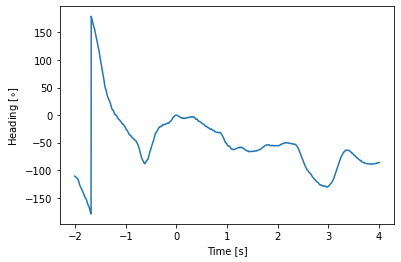

In [37]:
plt.close()
plt.plot(timestamps, np.rad2deg(heading))
plt.xlabel('Time [s]')
plt.ylabel('Heading [$\circ$]')
plt.show()

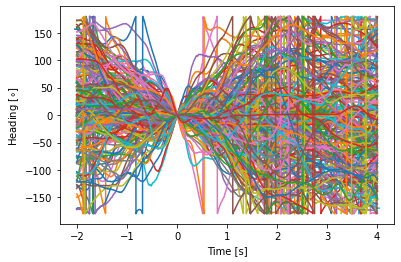

In [38]:
plt.close()

for epoch in range(len(fictrac_data_for_epoch)):
    timestamps = fictrac_data_for_epoch[epoch]['timestamps']
    dRotLabY = fictrac_data_for_epoch[epoch]['data']['rel_vec_world_y']
    dRotLabZ = fictrac_data_for_epoch[epoch]['data']['rel_vec_world_z']
    heading = fictrac_data_for_epoch[epoch]['data']['integrated_heading']
    plt.plot(timestamps, np.rad2deg(heading))

plt.xlabel('Time [s]')
plt.ylabel('Heading [$\circ$]')
plt.show()

In [41]:
def create_behavior_epoch_response_matrix(fictrac_data_table, data_name='integrated_heading', velocity=False, velocity_window_size=10, velocity_outlier_threshold=300):
    timestamps = []
    traces = []
    n_epochs = len(fictrac_data_table)
    for e in range(n_epochs):
        epoch_fictrac_data = fictrac_data_table[e]
        epoch_timestamps = epoch_fictrac_data['timestamps']
        epoch_trace = epoch_fictrac_data['data'][data_name]
        
        if data_name == 'integrated_heading':
            epoch_trace = np.unwrap(epoch_trace)

        if velocity:
            epoch_trace, epoch_timestamps = ftu.get_velocity(epoch_trace, epoch_timestamps, window_size=velocity_window_size, outlier_threshold=velocity_outlier_threshold)

        timestamps.append(epoch_timestamps)
        traces.append(epoch_trace)
        
    ts_standard, xs_standardized = gu.align_traces_to_standardized_timestamp(timestamps, traces, ts_standard=None, trim=False, min_time=None, max_time=None)
    
    if not velocity:
        idx_t0 = np.where(np.isclose(ts_standard, 0))[0][0]
        xs_standardized -= xs_standardized[:,idx_t0].reshape(-1, 1)
    
    return ts_standard, xs_standardized.reshape(1, *xs_standardized.shape)

def plot_trial_averages(x, mean_response, sem_response, unique_parameter_values, vlines=[], x_label='Time [s]', invert_x_axis=False, title=None, fig_name=None, velocity=False, ax=None):

    # Generate plot
    if ax is None:
        ax_initialized_here = True
        fig, ax = plt.subplots(1, 1, squeeze=True, sharey=True)
    else:
        ax_initialized_here = False
    for v in vlines:
        ax.axvline(v, color='k', linestyle='dashed', linewidth=1)
    ax.axhline(0, color='k', linestyle='solid', linewidth=1)
    pt.plot_w_error(y=np.rad2deg(mean_response[0]), x=x, ye=np.rad2deg(sem_response[0]), 
                    xlabel=x_label, ylabel='Heading velocity [$^\circ$/s]' if velocity else 'Integrated Heading [$^\circ$]', 
                    # xlim=[-run_params['pre_time'], run_params['stim_time']+run_params['tail_time']],
                    legend=[str(x) for x in unique_parameter_values], show_legend=True, 
                    title=title, ax=ax)
    if invert_x_axis:
        ax.invert_xaxis()

#     if fig_name is not None and ax_initialized_here:
#         savefig(fig_name, fig)


In [42]:
ts_standard, epoch_behavior_matrix = create_behavior_epoch_response_matrix(fictrac_data_for_epoch,
                                                                          'integrated_heading',
                                                                          velocity=False,
                                                                          velocity_window_size=10,
                                                                          velocity_outlier_threshold=300)

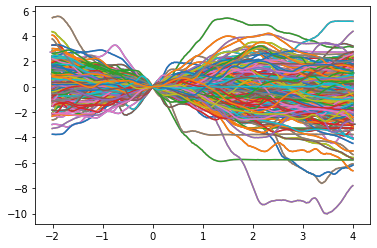

In [47]:
plt.plot(ts_standard,epoch_behavior_matrix[0].T)
plt.show()

In [48]:
# get trial averages
unique_parameter_values, mean_response, sem_response, trial_response_by_stimulus = series_data.getTrialAverages(
                                                                                            epoch_behavior_matrix, 
                                                                                            parameter_key=[], 
                                                                                            replace_parameter_value={}, 
                                                                                            min_samples='all')


In [ ]:
plt.figure()
plt.plot(ts_standard, mean_response)
plt.show()